#用核PCA实现非线性降维

由于大多数统计方法最开始都是线性的，所以，想解决非线性问题，就需要做一些调整。PCA也是一种线性变换。本主题将首先介绍它的非线性形式，然后介绍如何降维。

<!-- TEASER_END -->

##Getting ready

如果数据都是线性的，生活得多容易啊，可惜现实并非如此。核主成分分析（Kernel PCA）可以处理非线性问题。数据先通过核函数（kernel function）转换成一个新空间，然后再用PCA处理。

要理解核函数之前，建议先尝试如何生成一个能够通过核PCA里的核函数线性分割的数据集。下面我们用余弦核（cosine kernel）演示。这个主题比前面的主题多一些理论。

##How to do it...

余弦核可以用来比例样本空间中两个样本向量的夹角。当向量的大小（magnitude）用传统的距离度量不合适的时候，余弦核就有用了。

向量夹角的余弦公式如下：

$$cos(\theta)=\frac {A \cdot B} 
{{\begin{Vmatrix}
A
\end{Vmatrix}}
{\begin{Vmatrix}
B
\end{Vmatrix}}}
$$

向量$A$和$B$夹角的余弦是两向量点积除以两个向量各自的L2范数。向量$A$和$B$的大小不会影响余弦值。

让我们生成一些数据来演示一下用法。首先，我们假设有两个不同的过程数据（process），称为$A$和$B$：

In [13]:
import numpy as np
A1_mean = [1, 1]
A1_cov = [[2, .99], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
A2_mean = [5, 5]
A2_cov = [[2, .99], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
A = np.vstack((A1, A2))
B_mean = [5, 0]
B_cov = [[.5, -1], [.9, -.5]]
B = np.random.multivariate_normal(B_mean, B_cov, 100)

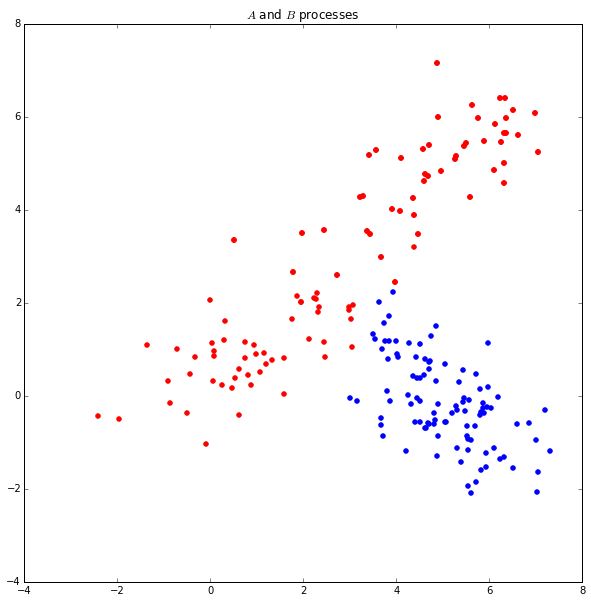

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)
ax.set_title("$A$ and $B$ processes")
ax.scatter(A[:, 0], A[:, 1], color='r')
ax.scatter(A2[:, 0], A2[:, 1], color='r')
ax.scatter(B[:, 0], B[:, 1], color='b')

上图看起来明显是两个不同的过程数据，但是用一超平面分割它们很难。因此，我们用前面介绍带余弦核的核PCA来处理：

In [25]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='cosine', n_components=1)
AB = np.vstack((A, B))
AB_transformed = kpca.fit_transform(AB)

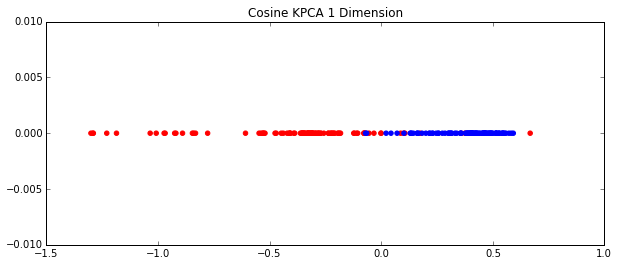

In [28]:
A_color = np.array(['r']*len(B))
B_color = np.array(['b']*len(B))
colors = np.hstack((A_color, B_color))
f = plt.figure(figsize=(10, 4))
ax = f.add_subplot(111)
ax.set_title("Cosine KPCA 1 Dimension")
ax.scatter(AB_transformed, np.zeros_like(AB_transformed), color=colors);

用带余弦核的核PCA处理后，数据集变成了一维。如果用PCA处理就是这样：

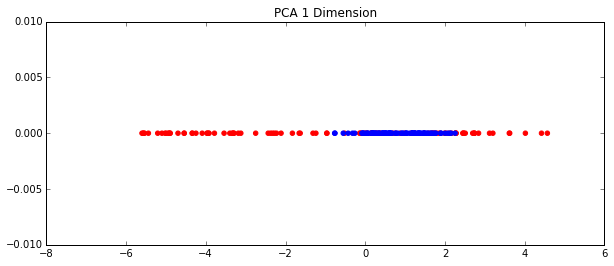

In [29]:
from sklearn.decomposition import PCA
pca = PCA(1)
AB_transformed_Reg = pca.fit_transform(AB)
f = plt.figure(figsize=(10, 4))
ax = f.add_subplot(111)
ax.set_title("PCA 1 Dimension")
ax.scatter(AB_transformed_Reg, np.zeros_like(AB_transformed_Reg), color=colors)

很明显，核PCA降维效果更好。

##How it works...

scikit-learn提供了几种像余弦核那样的核函数，也可以写自己的核函数。默认的函数有：

- 线性函数（linear）（默认值）
- 多项式函数（poly）
- 径向基函数（rbf，radial basis function）
- S形函数（sigmoid）
- 余弦函数（cosine）
- 用户自定义函数（precomputed）

还有一些因素会影响核函数的选择。例如，`degree`参数可以设置`poly`，`rbf`和`sigmoid `核函数的角度；而`gamma`会影响`rbf`和`poly`核，更多详情请查看[`KernelPCA`文档](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)。

后面关于支持向量机（SVM）的主题中将会进一步介绍`rbf`核函数。

需要注意的是：核函数处理非线性分离效果很好，但是一不小心就可能导致拟合过度。